In [1]:
# Multiple outputs per cell in Jupyter 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# %%javascript
# // Evitar autoscroll.
# IPython.OutputArea.prototype._should_scroll = function(lines) {
#     return false;
# }

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
from skeleton import *
from sklearn.metrics import (recall_score, f1_score,
                             precision_score, accuracy_score)

In [5]:
def testClassifier(clf,train,y_train,test,y_test):
    print("=== ",clf.__class__.__name__,end='')
    print(":",vars(clf))
    clf=clf.fit(train,y_train)
    #Predecimos las etiqueta del conjunto de prueba
    yp=clf.predict(test)
    # Medidas de bondad
    scores={}

    scores['Accuracy']=accuracy_score(y_test,yp)
    scores['Macro F1']=f1_score(y_test,yp,average='macro')
    scores['Macro Recall']=recall_score(y_test,yp,average='macro')
    scores['F1 is_humor=1']=f1_score(y_test,yp)
    
    print("Accuracy","Macro F1","Macro Recall","F1 is_humor=1",sep='\t')
    {:.2f}
    print("{:.5f}\t{:.5f}\t{:.5f}\t{:.5f}".format(
        scores['Accuracy'],scores['Macro F1'],scores['Macro Recall'],scores['F1 is_humor=1']))
                            
#     print("Recall: ", scores['recall'])
#     print("F1: ", scores['f1'])
#     print("Accuracy: ", scores['accuracy'])
#     print("F1 Humor: ", scores['f1_humor'])
    #Vemos la frontera de decisión
    plotDecisionBoundary(clf,train, y_train)
    return scores

## Un problema de texto  (Identificación de humor HAHA -2019)

Para este ejemplo utilizaremos los datos proporcionados para la tarea 1 del HAHA - Humor Analysis based on Human Annotation, la cual consiste determinar si tweets en español son humorísticos o no (un problema de clasificación binaria). Esta tarea forma parte del Iberian Languages Evaluation Forum (IberLEF 2019).

### Corpus 

El conjunto de datos fue etiquetado como se indica [5]. Todos los tweets están etiquetados como humorístico **is_humor=1**  o no humorístico **is_humor=0**. Los datos relevantes para el problema se clasificación ser muestran en el siguiente ejemplo:

|Desscripción|Clave|Valor|
|:------:|:------:|:-----:|
|Tweet |text|Después de la tormenta sale... Tu mamá gritando porque no metiste la ropa.|
|Etiqueta de clase|is_humor|1|
|Representación vectorial|vec| Vectores de dimensión 300 (FastText preentrenados para español) |
|Identificador|id|942079817905770496|



In [6]:
# Cargamos lod datos.
train_data=pd.read_json('data/haha_train_ft_pre_min10.json',lines=True)

In [7]:
#Vemos los primeros 5
train_data.head()[['id','text','is_humor','vec']]

,id,text,is_humor,vec
0,965767017268678658,Amo a @CamilaTuDiosaxD,0,"[-0.06692000000000001, 0.13184, -0.0030723, -0..."
1,965811724392726528,@NamiNapoleon hola como estan me pueden seguir,0,"[-0.06776, -0.24253000000000002, -0.0065559999..."
2,964984559547777024,Típico : Estar viajando en taxi y pensar tácti...,1,"[-0.044634, -0.049435, -0.053049, -0.026851, 0..."
3,941669646364762113,Me gusta todo de ti.. te amo espejo.,1,"[-0.022054999999999998, -0.064284, -0.052083, ..."
4,1009142890415652866,""" Egipto siempre acaba afuera ""\r\n\r\nCleopatra",1,"[0.066164, -0.082201, -0.022706, -0.047533, 0...."


In [8]:
#Dimensión de los vectores
len(train_data.vec[3])

300

In [9]:
# Los datos de prueba
test_data=pd.read_json('data/haha_test_ft_pre_min10.json',lines=True)

In [10]:
#Obtenemos la representación vectorial para los conjunto de prueba y entrenamiento
train,y_train=np.array([np.array(x) for x in train_data.vec]),np.array(train_data.is_humor)
test,y_test=np.array([np.array(x) for x in test_data.vec]),np.array(test_data.is_humor)

===  NearestCentroid: {'distance': <function coseno at 0x7fb667c8eb00>, 'algorithm': <bound method NearestCentroid.Average of <skeleton.NearestCentroid object at 0x7fb666e6dd50>>, 'kwargs_': {}}
Accuracy	Macro F1	Macro Recall	F1 is_humor=1
0.7083333333333334	0.7069199457259159	0.7108108108108109	0.7272727272727272


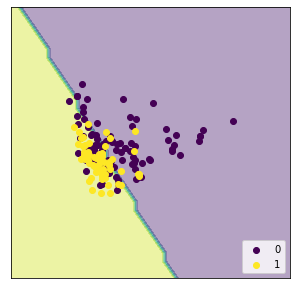

===  NearestCentroid: {'distance': <function coseno at 0x7fb667c8eb00>, 'algorithm': <bound method NearestCentroid.Sum of <skeleton.NearestCentroid object at 0x7fb666e6dd90>>, 'kwargs_': {}}
Accuracy	Macro F1	Macro Recall	F1 is_humor=1
0.7083333333333334	0.7069199457259159	0.7108108108108109	0.7272727272727272


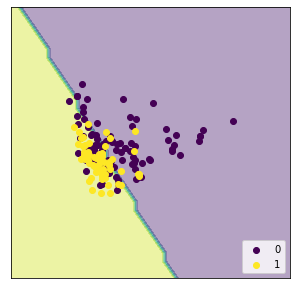

===  NearestCentroid: {'distance': <function coseno at 0x7fb667c8eb00>, 'algorithm': <bound method NearestCentroid.Rocchio of <skeleton.NearestCentroid object at 0x7fb666e31e90>>, 'kwargs_': {}}
Accuracy	Macro F1	Macro Recall	F1 is_humor=1
0.7222222222222222	0.7213622291021672	0.7243243243243244	0.736842105263158


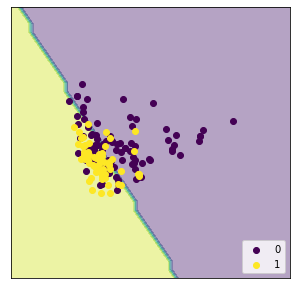

===  NearestCentroid: {'distance': <function coseno at 0x7fb667c8eb00>, 'algorithm': <bound method NearestCentroid.NormSum of <skeleton.NearestCentroid object at 0x7fb666d8fe50>>, 'kwargs_': {}}
Accuracy	Macro F1	Macro Recall	F1 is_humor=1
0.7083333333333334	0.7069199457259159	0.7108108108108109	0.7272727272727272


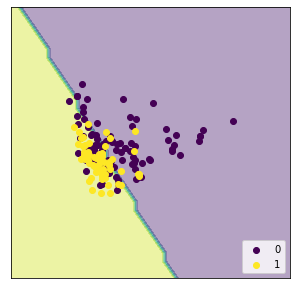

===  kNN: {'weight': <bound method kNN._uniform of <skeleton.kNN object at 0x7fb666ac20d0>>, 'distance': 'coseno', 'k': 5}
Accuracy	Macro F1	Macro Recall	F1 is_humor=1
0.6805555555555556	0.6754850088183422	0.6776061776061776	0.634920634920635


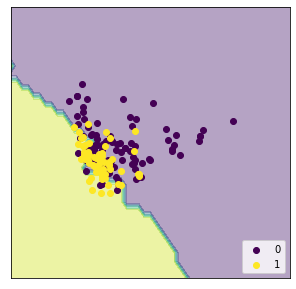

===  kNN: {'weight': <bound method kNN._mean_dist of <skeleton.kNN object at 0x7fb666ac2050>>, 'distance': 'coseno', 'k': 5}
Implementación mean_dist
Accuracy	Macro F1	Macro Recall	F1 is_humor=1
0.6111111111111112	0.6108108108108108	0.6123552123552123	0.6216216216216216
Implementación mean_dist


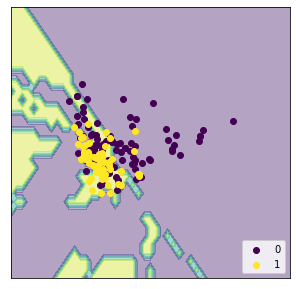

===  kNN: {'weight': <bound method kNN._weighed_dist of <skeleton.kNN object at 0x7fb666a23810>>, 'distance': 'coseno', 'k': 5}
Implementación weighed_dist
Accuracy	Macro F1	Macro Recall	F1 is_humor=1
0.6805555555555556	0.6754850088183422	0.6776061776061776	0.634920634920635
Implementación weighed_dist


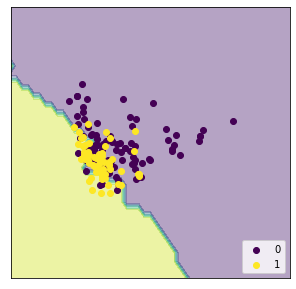

===  NearestCentroid: {'distance': <function euclidiana at 0x7fb66a183f80>, 'algorithm': <bound method NearestCentroid.Average of <skeleton.NearestCentroid object at 0x7fb666a0e250>>, 'kwargs_': {}}
Accuracy	Macro F1	Macro Recall	F1 is_humor=1
0.7083333333333334	0.7055501460564753	0.7115830115830116	0.7341772151898734


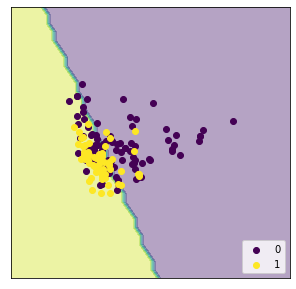

===  NearestCentroid: {'distance': <function euclidiana at 0x7fb66a183f80>, 'algorithm': <bound method NearestCentroid.Sum of <skeleton.NearestCentroid object at 0x7fb66697ec90>>, 'kwargs_': {}}
Accuracy	Macro F1	Macro Recall	F1 is_humor=1
0.4861111111111111	0.32710280373831774	0.5	0.6542056074766355


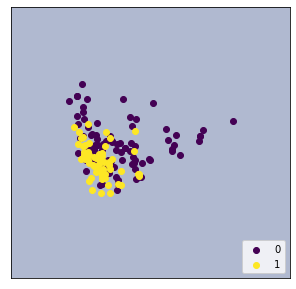

===  NearestCentroid: {'distance': <function euclidiana at 0x7fb66a183f80>, 'algorithm': <bound method NearestCentroid.Rocchio of <skeleton.NearestCentroid object at 0x7fb66697ebd0>>, 'kwargs_': {}}
Accuracy	Macro F1	Macro Recall	F1 is_humor=1
0.5138888888888888	0.33944954128440363	0.5	0.0


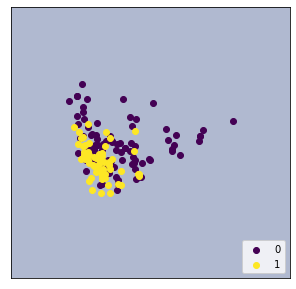

===  NearestCentroid: {'distance': <function euclidiana at 0x7fb66a183f80>, 'algorithm': <bound method NearestCentroid.NormSum of <skeleton.NearestCentroid object at 0x7fb666a3db90>>, 'kwargs_': {}}
Accuracy	Macro F1	Macro Recall	F1 is_humor=1
0.7083333333333334	0.7069199457259159	0.7108108108108109	0.7272727272727272


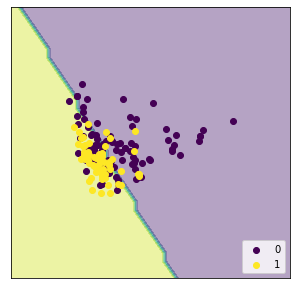

===  kNN: {'weight': <bound method kNN._uniform of <skeleton.kNN object at 0x7fb667acc150>>, 'distance': 'euclidiana', 'k': 5}
Accuracy	Macro F1	Macro Recall	F1 is_humor=1
0.6388888888888888	0.6386100386100386	0.6386100386100386	0.6285714285714286


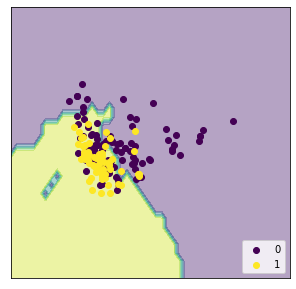

===  kNN: {'weight': <bound method kNN._mean_dist of <skeleton.kNN object at 0x7fb666949e90>>, 'distance': 'euclidiana', 'k': 5}
Implementación mean_dist
Accuracy	Macro F1	Macro Recall	F1 is_humor=1
0.6805555555555556	0.6799999999999999	0.6799227799227799	0.6666666666666666
Implementación mean_dist


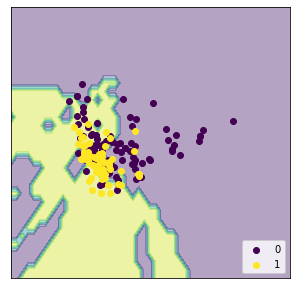

===  kNN: {'weight': <bound method kNN._weighed_dist of <skeleton.kNN object at 0x7fb666a91710>>, 'distance': 'euclidiana', 'k': 5}
Implementación weighed_dist
Accuracy	Macro F1	Macro Recall	F1 is_humor=1
0.6388888888888888	0.6386100386100386	0.6386100386100386	0.6285714285714286
Implementación weighed_dist


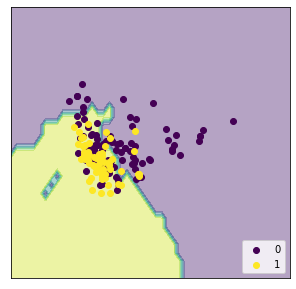

In [11]:
P={"FastText":{"Accuracy":0.80905,"Macro F1":0.79327,"Macro Recall":0.78690,"F1 is_humor=1":0.73614}} #Performance

P["NC.cos.avg"]=testClassifier(NearestCentroid(distance='coseno',centroid_type='Average'),train,y_train,test,y_test)
P["NC.cos.sum"]=testClassifier(NearestCentroid(distance='coseno',centroid_type='Sum'),train,y_train,test,y_test)
P["NC.cos.rocchio"]=testClassifier(NearestCentroid(distance='coseno',centroid_type='Rocchio'),train,y_train,test,y_test)
P["NC.cos.nsum"]=testClassifier(NearestCentroid(distance='coseno',centroid_type='NormSum'),train,y_train,test,y_test)

P["KNN.cos.u"]=testClassifier(kNN(distance='coseno',k=5,weight_type='uniform'),train,y_train,test,y_test)
P["KNN.cos.m"]=testClassifier(kNN(distance='coseno',k=5,weight_type='mean_dist'),train,y_train,test,y_test)
P["KNN.cos.w"]=testClassifier(kNN(distance='coseno',k=5,weight_type='weighed_dist'),train,y_train,test,y_test)

P["NC.euc.avg"]=testClassifier(NearestCentroid(distance='euclidiana',centroid_type='Average'),train,y_train,test,y_test)
P["NC.euc.sum"]=testClassifier(NearestCentroid(distance='euclidiana',centroid_type='Sum'),train,y_train,test,y_test)
P["NC.euc.rocchio"]=testClassifier(NearestCentroid(distance='euclidiana',centroid_type='Rocchio'),train,y_train,test,y_test)
P["NC.euc.nsum"]=testClassifier(NearestCentroid(distance='euclidiana',centroid_type='NormSum'),train,y_train,test,y_test)

P["KNN.euc.u"]=testClassifier(kNN(distance='euclidiana',k=5,weight_type='uniform'),train,y_train,test,y_test)
P["KNN.euc.m"]=testClassifier(kNN(distance='euclidiana',k=5,weight_type='mean_dist'),train,y_train,test,y_test)
P["KNN.euc.w"]=testClassifier(kNN(distance='euclidiana',k=5,weight_type='weighed_dist'),train,y_train,test,y_test)

In [12]:
pd.DataFrame(P).T.sort_values("f1_humor",ascending =False)

KeyError: 'f1_humor'